In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [12]:
pwd = os.getcwd()
filepath = os.path.join(pwd,"housing.csv")
filepath

'/media/yuk/HOLLOW/SharedRoot/ProjectLearning/Project-1B/housing.csv'

In [13]:
housing_data = pd.read_csv(filepath)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='ocean_proximity'>

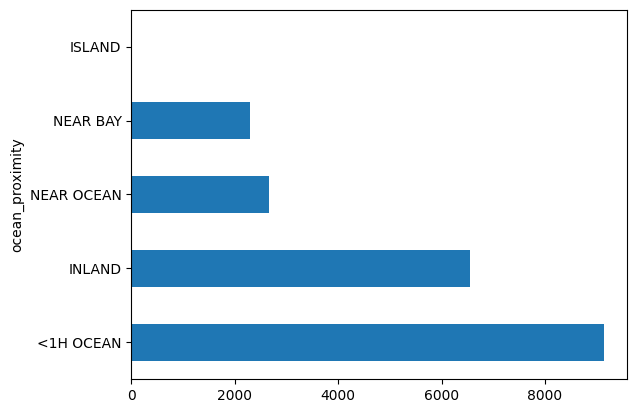

In [16]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [17]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

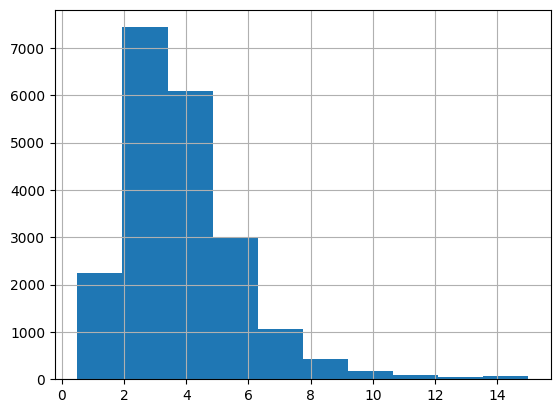

In [18]:
housing_data["median_income"].hist()

In [19]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                               bins = [0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

In [20]:
housing_data["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

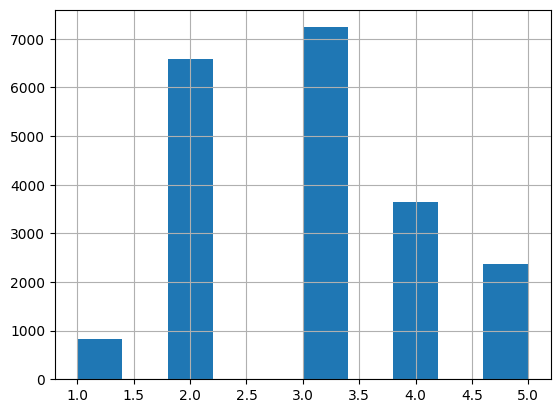

In [21]:
housing_data["income_cat"].hist()

In [22]:
y = housing_data["median_house_value"]

X = housing_data.drop("median_house_value", axis =1)


In [23]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_test,y_train = train_test_split(X,y, test_size=0.33 )

In [25]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
20390,-118.91,34.22,15.0,5644.0,757.0,2659.0,783.0,6.7559,<1H OCEAN,5
11639,-118.05,33.83,24.0,4316.0,678.0,2286.0,665.0,5.7018,<1H OCEAN,4
18480,-121.56,37.08,17.0,6725.0,1051.0,3439.0,1027.0,6.4313,<1H OCEAN,5
16306,-121.36,38.01,16.0,926.0,230.0,451.0,198.0,4.0221,INLAND,3
19717,-121.67,39.26,29.0,3041.0,683.0,2106.0,687.0,1.6315,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
19968,-119.09,36.21,43.0,1335.0,280.0,943.0,288.0,1.9861,INLAND,2
19727,-121.47,38.95,34.0,2129.0,350.0,969.0,314.0,2.7039,INLAND,2
18000,-121.98,37.28,26.0,1182.0,309.0,620.0,306.0,3.3922,<1H OCEAN,3
3268,-122.92,39.08,24.0,341.0,64.0,146.0,57.0,4.0000,INLAND,3


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index , test_index in split.split(housing_data,housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]
    

In [27]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [29]:
strat_train_set.drop("income_cat",axis="columns",inplace=True)
strat_test_set.drop("income_cat",axis="columns",inplace=True)

In [30]:
housing = strat_train_set.copy()

In [31]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

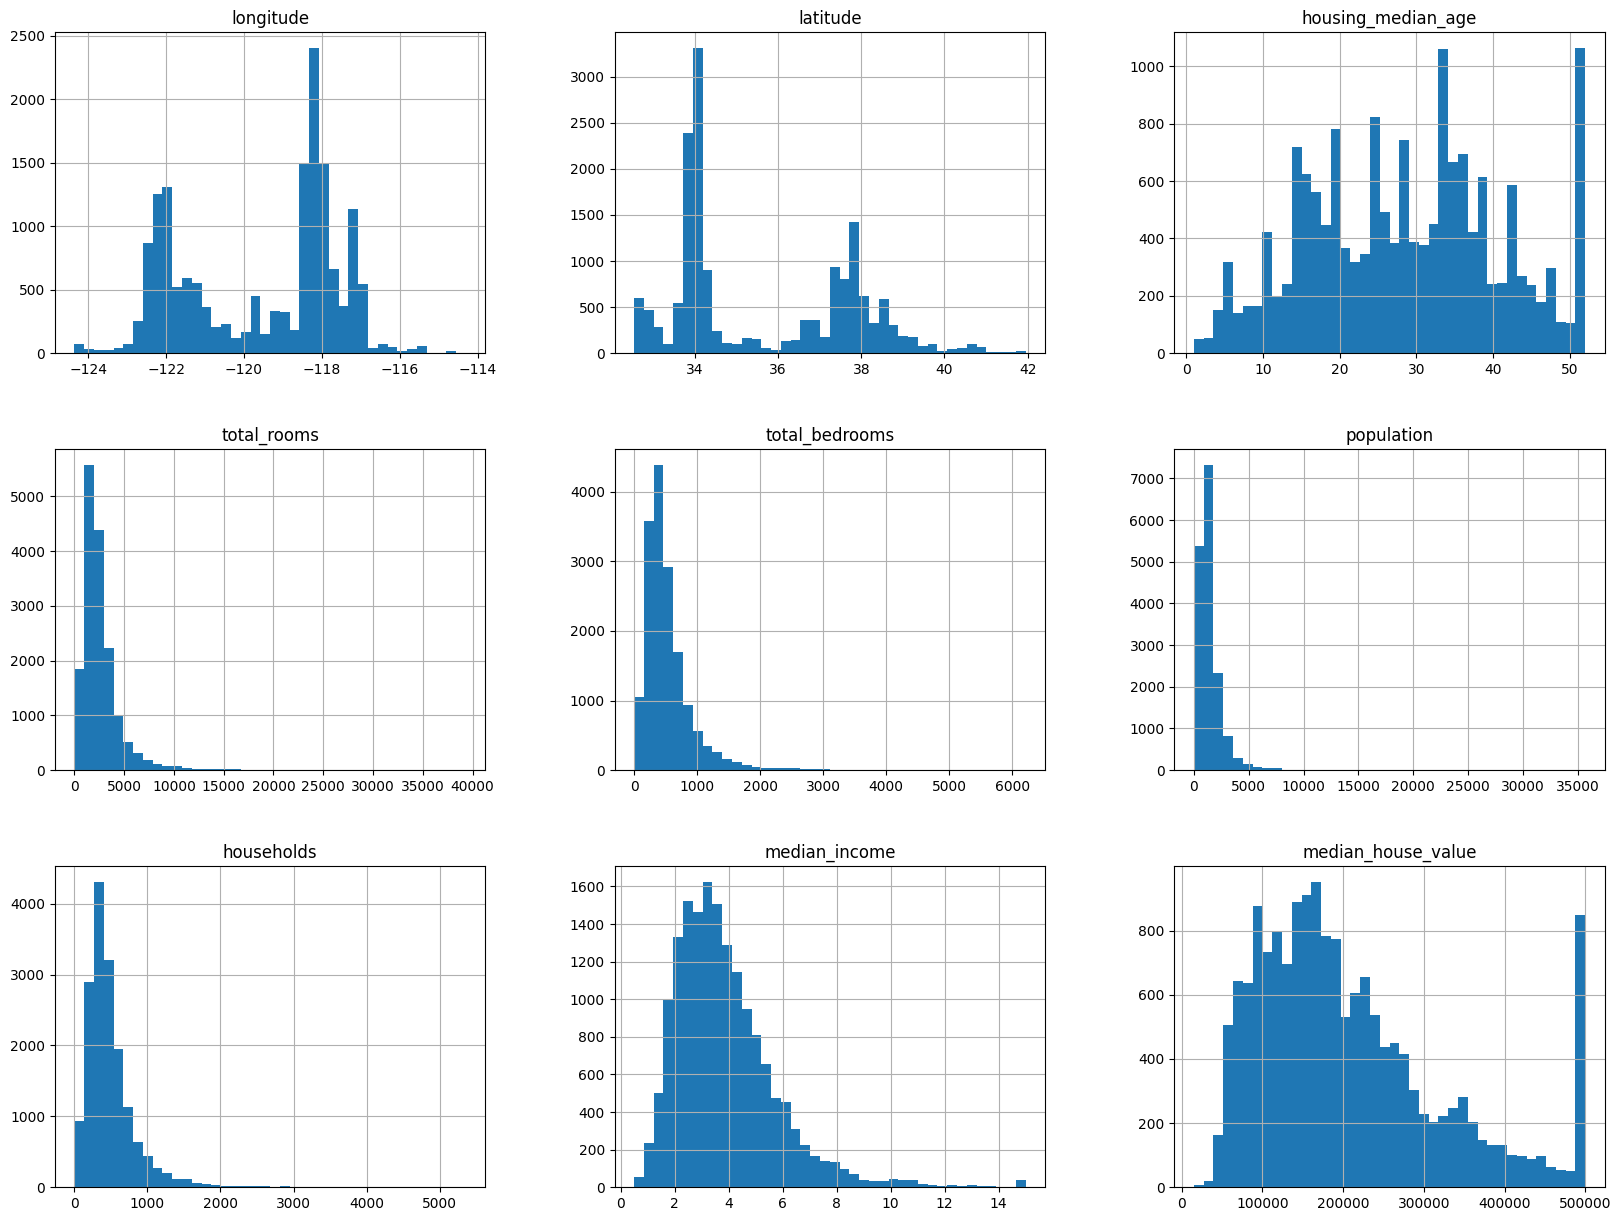

In [32]:
housing.hist(bins = 40,figsize=(20,15))

<Axes: >

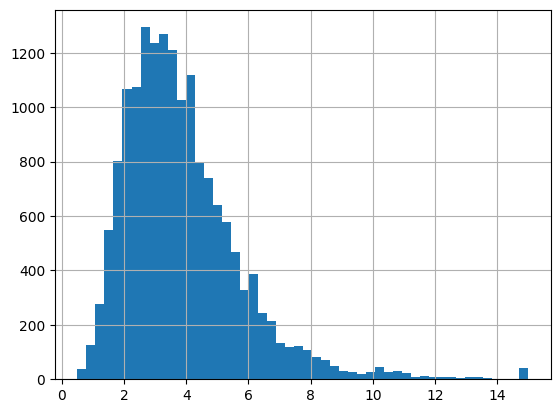

In [33]:
housing["median_income"].hist(bins=50)

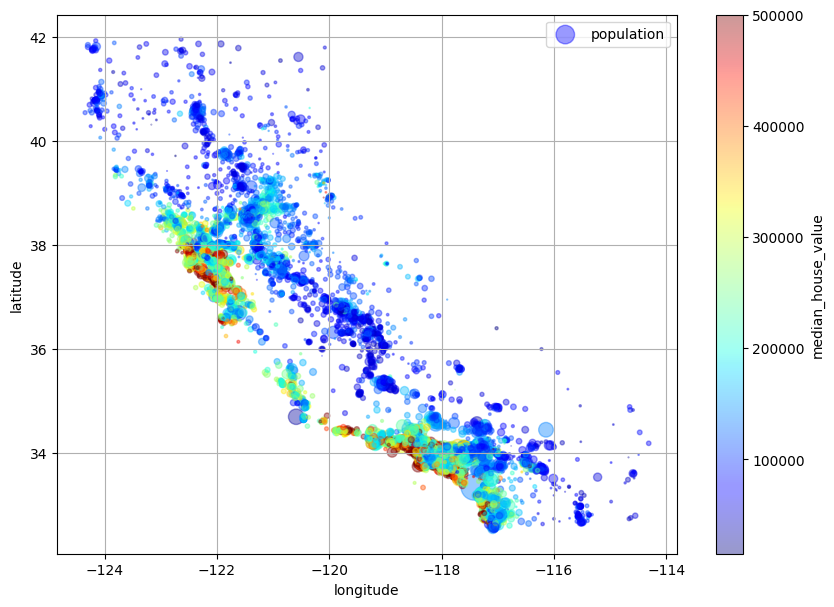

In [34]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s = housing["population"]/100,label="population",
             c="median_house_value",cmap="jet",colorbar=True,legend = "true",sharex=False,figsize=(10,7),alpha=0.4)
plt.show()

In [35]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

<Axes: >

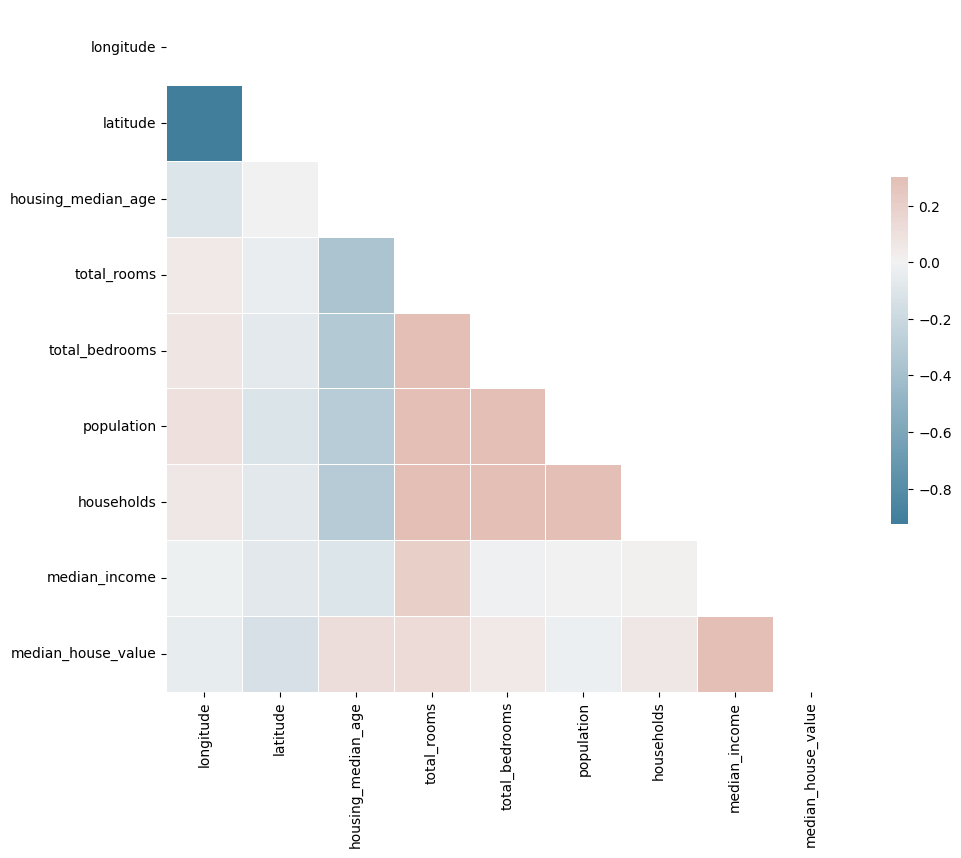

In [36]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [38]:
housing_labels = strat_train_set["median_house_value"].copy()

In [39]:
null_data = housing[housing.isnull().any(axis=1)].head()
null_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [40]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [41]:
print("Missing values before:", housing["total_bedrooms"].isnull().sum())


Missing values before: 158


In [42]:
housing_num= housing.select_dtypes(include=[np.number])

In [43]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan , strategy='median')
#imp.fit(housing_num[["total_bedrooms"]])
#housing_num['total_bedrooms'] = imp.transform(housing_num[['total_bedrooms']])
housing_num['total_bedrooms'] = imp.fit_transform(housing_num[['total_bedrooms']])

In [44]:
print("Missing values after:", housing_num["total_bedrooms"].isnull().sum())

Missing values after: 0


In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [46]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [47]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [48]:
def feature_engineering(data):
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    data["bedrooms_ratio"] = data["total_bedrooms"] / data["households"]
    data["people_per_house"] = data["population"] / data["households"]
    return data

In [49]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_ratio,people_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,1.128895,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,1.113281,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,1.033333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,1.074534,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,1.113793,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,1.229770,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,1.002821,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.965116,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,1.157685,2.411178


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)

In [51]:
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.04629766,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
         0.01826884, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.12524691, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.2477044 , -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
         0.09797804, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.04272245,  0.00657083]], shape=(16512, 11))

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def transformed_pipline(data):
    
   
    if "median_house_value" in data.columns:
        lables = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        lables = None
        
    feature_enginee_data = feature_engineering(data)
    features = list(feature_enginee_data.columns)
    
    num_attribs = data.select_dtypes(include=[np.number])
    cat_attribs = data.select_dtypes(include=['object'])
    
    
    imp = SimpleImputer(strategy='median')
    num_attribs = pd.DataFrame(imp.fit_transform(num_attribs), columns=num_attribs.columns)
    
    scaleStandar = StandardScaler()
    num_attribs = pd.DataFrame(scaleStandar.fit_transform(num_attribs), columns=num_attribs.columns)
    
    encode = OneHotEncoder(sparse_output=False ,handle_unknown='ignore')
    cat_attribs = pd.DataFrame(encode.fit_transform(cat_attribs),columns=encode.get_feature_names_out(cat_attribs.columns))
    
                               
    housing_prepared = pd.concat([num_attribs,cat_attribs],axis=1)
    
    return housing_prepared , lables , features
    
    

In [53]:
train_data, train_labels ,features = transformed_pipline(strat_train_set)

In [54]:
print("Missing values after:", train_data["total_bedrooms"].isnull().sum())

Missing values after: 0


In [55]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.060189,0.006223,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,0.029389,-0.040811,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.128316,-0.075371,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.047044,-0.106803,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.030398,0.006109,1.0,0.0,0.0,0.0,0.0


In [56]:
train_data.describe().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000,16512.000
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.441,0.319,0.000,0.112,0.129
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.496,0.466,0.011,0.315,0.335
min,-2.385,-1.450,-2.199,-1.224,-1.295,-1.270,-1.318,-1.772,-1.650,-1.509,-0.208,0.000,0.000,0.000,0.000,0.000
25%,-1.111,-0.795,-0.847,-0.552,-0.579,-0.570,-0.580,-0.687,-0.382,-0.182,-0.057,0.000,0.000,0.000,0.000,0.000
50%,0.532,-0.645,0.028,-0.235,-0.246,-0.229,-0.237,-0.176,-0.080,-0.098,-0.024,0.000,0.000,0.000,0.000,0.000
75%,0.782,0.973,0.664,0.242,0.261,0.268,0.279,0.456,0.236,0.000,0.016,1.000,1.000,0.000,0.000,0.000
max,2.630,2.952,1.857,17.162,13.817,30.711,12.939,5.840,52.254,65.033,107.060,1.000,1.000,1.000,1.000,1.000


In [57]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_ratio',
 'people_per_house']

In [58]:
test_data, test_labels ,features = transformed_pipline(strat_test_set)

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)


RandomForestRegressor(random_state=42)

In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18782.201258317946)

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [51715.35024655 49552.89145449 46758.24474329 51983.50388826
 47823.3554912  51012.27233985 53182.02235144 50087.88762531
 48454.77002477 54678.7802318 ]
Mean: 50524.90783969575
Standard deviation: 2345.30386428754


In [64]:
from sklearn .linear_model import LinearRegression
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)

pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69173.589777
std       2423.038289
min      64914.420793
25%      67463.260691
50%      69278.000801
75%      70500.050983
max      72778.868826
dtype: float64

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Then try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

# Train across 5 folds, that's a total of (12+6)×5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(train_data, train_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)

rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a62afb42ff0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a62afdb4a70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.64416369e-02, 7.49997463e-02, 4.03634906e-02, 1.93443452e-02,
       1.71053382e-02, 1.81424851e-02, 1.57398261e-02, 3.45679116e-01,
       7.48578475e-02, 2.50646775e-02, 1.05629420e-01, 1.87591842e-02,
       1.48503144e-01, 5.67829079e-05, 3.71626707e-03, 5.59669220e-03])

In [71]:
feature_importance_list = list(zip(features , feature_importances.tolist()))
feature_importance_list

[('longitude', 0.08644163688909214),
 ('latitude', 0.07499974628843278),
 ('housing_median_age', 0.040363490622875295),
 ('total_rooms', 0.019344345212524688),
 ('total_bedrooms', 0.017105338158353953),
 ('population', 0.018142485053593546),
 ('households', 0.015739826082785877),
 ('median_income', 0.34567911613978625),
 ('ocean_proximity', 0.074857847526654),
 ('rooms_per_household', 0.025064677545352087),
 ('bedrooms_ratio', 0.1056294204345409),
 ('people_per_house', 0.01875918421985748)]

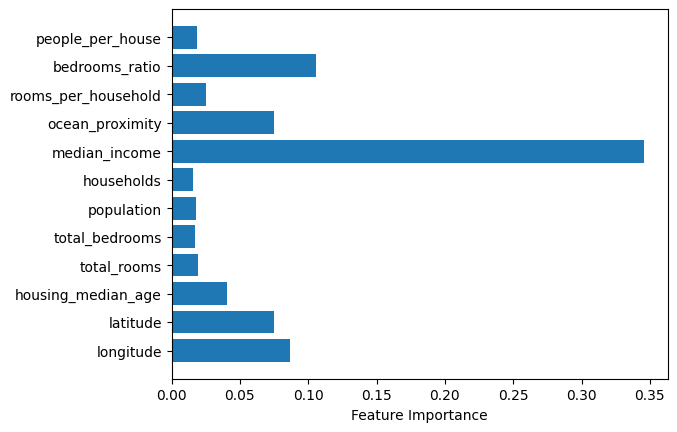

In [74]:
import matplotlib.pyplot as plt

# Data
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population', 'households', 'median_income',
            'ocean_proximity', 'rooms_per_household', 'bedrooms_ratio', 'people_per_house']

importances = [0.0864, 0.0750, 0.0404, 0.0193, 0.0171, 0.0181, 0.0157, 
               0.3457, 0.0749, 0.0251, 0.1056, 0.0188]

# Plot
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.show()
